<a href="https://colab.research.google.com/github/syamkumarthebeginner/wildlife_animal-internship-2025/blob/main/multi_class_animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is available')
else:
  print('gpu is not available')


GPU is available


In [4]:
dataset_path="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

# List all the classes (Animal Types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')


Number of Classes: 90
Classes: ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


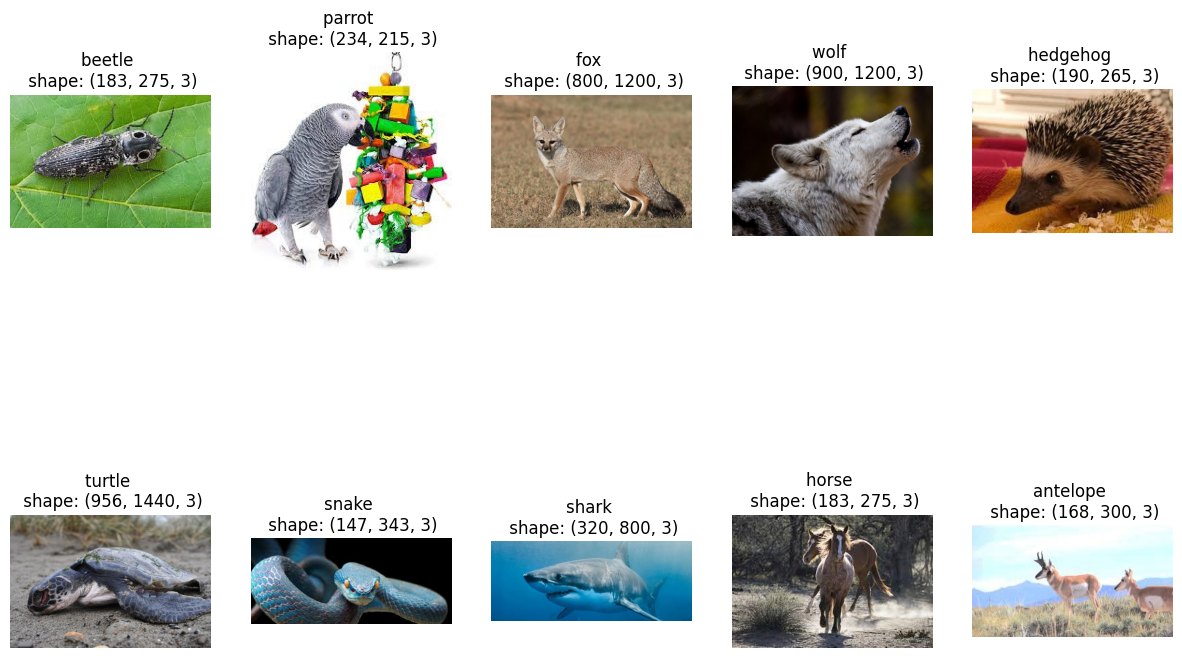

In [5]:
plt.figure(figsize=(15,10))
for i, class_name in enumerate(classes[:10]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()


In [6]:
print("\nImage count per class:")
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    image_count = len(os.listdir(class_path))
    print(f"{class_name}: {image_count} images")



Image count per class:
beetle: 60 images
parrot: 60 images
fox: 60 images
wolf: 60 images
hedgehog: 60 images
turtle: 60 images
snake: 60 images
shark: 60 images
horse: 60 images
antelope: 60 images
hamster: 60 images
woodpecker: 60 images
eagle: 60 images
chimpanzee: 60 images
bison: 60 images
penguin: 60 images
butterfly: 60 images
sandpiper: 60 images
hornbill: 60 images
lion: 60 images
lobster: 60 images
oyster: 60 images
otter: 60 images
grasshopper: 60 images
raccoon: 60 images
dog: 60 images
pigeon: 60 images
donkey: 60 images
hippopotamus: 60 images
hummingbird: 60 images
bear: 60 images
coyote: 60 images
bee: 60 images
pig: 60 images
rat: 60 images
owl: 60 images
caterpillar: 60 images
koala: 60 images
squid: 60 images
hare: 60 images
whale: 60 images
mouse: 60 images
tiger: 60 images
fly: 60 images
lizard: 60 images
orangutan: 60 images
bat: 60 images
porcupine: 60 images
kangaroo: 60 images
gorilla: 60 images
starfish: 60 images
mosquito: 60 images
crow: 60 images
possum: 6

In [7]:

img_size = (224, 224)
batch_size = 64

# Data Augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [8]:
# Map the classes - class_indices
class_indices = train_generator.class_indices
print(class_indices)
# Extract class names
class_names = list(class_indices.keys())
print("Class Names:", class_names)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define input shape
input_dimensions = (224, 224, 3)

# Initialize MobileNetV2 base model with pretrained ImageNet weights
feature_extractor = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=input_dimensions)
)

# Freeze feature extractor layers (prevent them from being trained)
feature_extractor.trainable = False

# Add custom classification head
gap_layer = GlobalAveragePooling2D()(feature_extractor.output)
dense_layer = Dense(units=512, activation='relu')(gap_layer)
dropout_layer = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_layer)

# Create the full model
animal_classifier = Model(inputs=feature_extractor.input, outputs=output_layer)

# Compile the model
animal_classifier.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
animal_classifier.summary()


<ipython-input-19-82e424289d29>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  feature_extractor = MobileNetV2(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,960,026 (11.29 MB)

 Trainable params: 702,042 (2.68 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs = 20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 966ms/step - accuracy: 0.0536 - loss: 4.4723 - val_accuracy: 0.5352 - val_loss: 3.1990
Epoch 2/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.2188 - loss: 3.4055

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.2188 - loss: 3.4055 - val_accuracy: 0.5293 - val_loss: 3.1938
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.4322 - loss: 2.9224 - val_accuracy: 0.7344 - val_loss: 1.8595
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5000 - loss: 2.2788 - val_accuracy: 0.7422 - val_loss: 1.8417
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6556 - loss: 1.7106 - val_accuracy: 0.7930 - val_loss: 1.1937
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6250 - loss: 1.7251 - val_accuracy: 0.7910 - val_loss: 1.1691
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 503ms/step - accuracy: 0.7393 - loss: 1.1778 - val_accuracy: 0.8047 - val_loss: 0.9547
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7500 - loss: 1.1325 - val_accuracy: 0.8164 - val_loss: 0.9348
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 549ms/step - accuracy: 0.7897 - loss: 0.9095 - val_accuracy: 0.8359 - val_loss

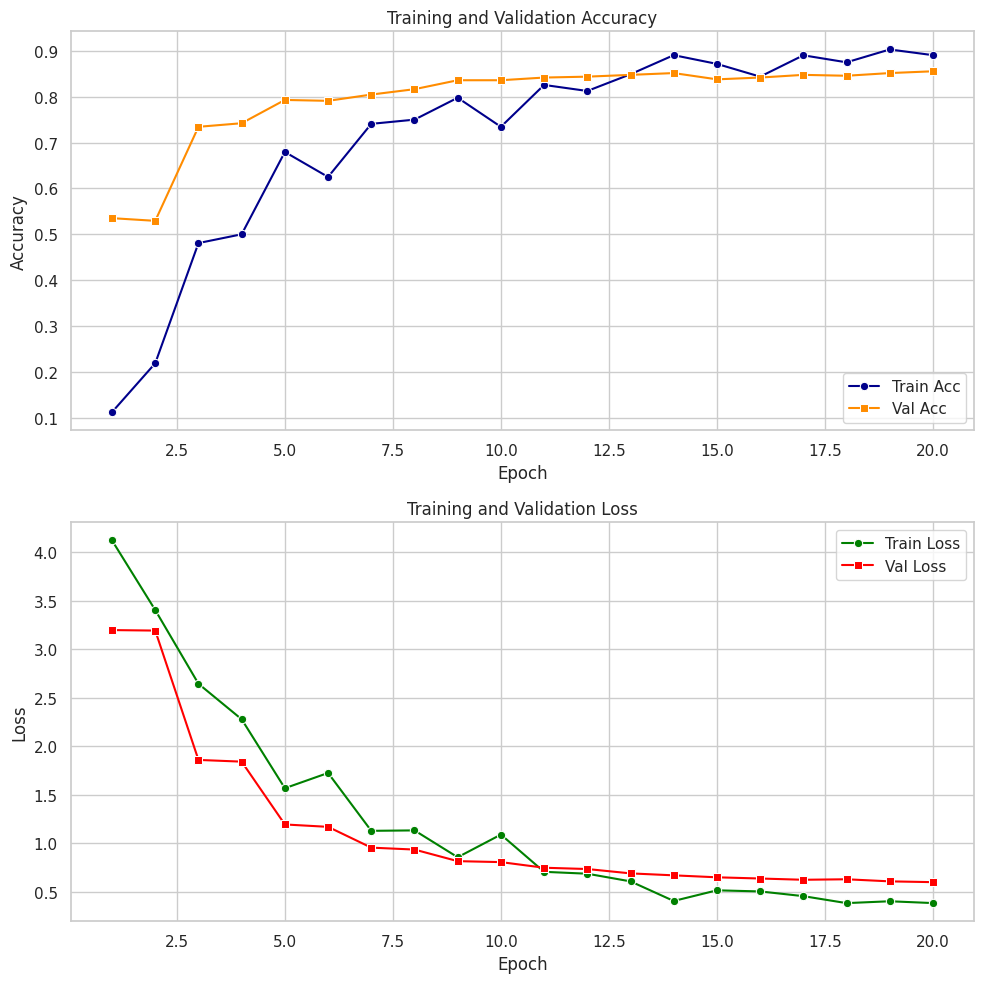

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a new visual style using seaborn
sns.set(style="whitegrid")

# Extract accuracy and loss values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_acc) + 1)

# Create figure
fig, ax = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows instead of 1 row and 2 cols

# Plot Accuracy
sns.lineplot(x=epochs_range, y=train_acc, label='Train Acc', ax=ax[0], marker='o', color='darkblue')
sns.lineplot(x=epochs_range, y=val_acc, label='Val Acc', ax=ax[0], marker='s', color='darkorange')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot Loss
sns.lineplot(x=epochs_range, y=train_loss, label='Train Loss', ax=ax[1], marker='o', color='green')
sns.lineplot(x=epochs_range, y=val_loss, label='Val Loss', ax=ax[1], marker='s', color='red')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 830ms/step - accuracy: 0.8510 - loss: 0.6057
Validation Loss: 0.5970242023468018
Validation Accuracy: 0.8574073910713196


In [13]:
# Save the model
model.save('MCAR.keras')

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('MCAR.keras')

def predict_animal(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [16]:
os.listdir('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/wolf')

['9cdcad3179.jpg',
 '247beaf6bd.jpg',
 '5f01c34451.jpg',
 '15eebd79cb.jpg',
 '2a1a8a7e14.jpg',
 '843e6810e0.jpg',
 '7fd7fe81cf.jpg',
 '6e61499ab8.jpg',
 '58eac1d1a1.jpg',
 '0e7ce42fd2.jpg',
 '1a4ffd8af3.jpg',
 '3b448618eb.jpg',
 '573b1b0393.jpg',
 '432cfb1258.jpg',
 '3b2e27503f.jpg',
 '47d8f719cb.jpg',
 '996fb0a526.jpg',
 '3ee1588420.jpg',
 '7b04dad848.jpg',
 '389b3092bc.jpg',
 '85d7b35232.jpg',
 '7e89ab5ef0.jpg',
 '443e0ad4e7.jpg',
 '277c434994.jpg',
 '778d849672.jpg',
 '55c94eb8c6.jpg',
 '7b1b59b5a5.jpg',
 '0e238d32f4.jpg',
 '3dbd3f4fc9.jpg',
 '0f43a8237e.jpg',
 '55fd9f9b33.jpg',
 '06e320f74d.jpg',
 '98e5a29f90.jpg',
 '34bd22f913.jpg',
 '0db670ecbe.jpg',
 '5aa817b12f.jpg',
 '365b582c58.jpg',
 '27bcfb5fec.jpg',
 '49a0c85b3b.jpg',
 '1e6019d07d.jpg',
 '0dac8cc0bf.jpg',
 '07c803c409.jpg',
 '6b1295488f.jpg',
 '05fa57874a.jpg',
 '6d01eb24e1.jpg',
 '3e6d5f5ded.jpg',
 '9c3db9d85d.jpg',
 '352ef543bf.jpg',
 '702ef9b06a.jpg',
 '9aaeb59193.jpg',
 '9a059979c1.jpg',
 '5e589e73ec.jpg',
 '6f8cb24654

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


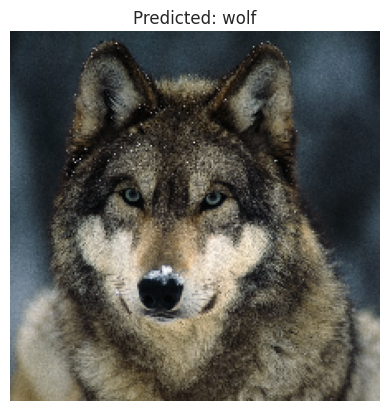

In [17]:
predict_animal('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/wolf/7b04dad848.jpg')